GitHub Commit History: https://github.com/MatthewHealy02/AI-Programming-Assessments

## Package Imports:

In [1]:
# Import pandas and numpy modules;

import pandas as pd
import numpy as np

# Import DataFrame visualisation modules;

import matplotlib.pyplot as plt
import seaborn as sns

# Import DataFrame preprocessing moduels;

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Import warnings;

import warnings as w

# Import time for model computational efficiency evaluations;

import time as t

# Ignore warnings;

w.filterwarnings('ignore')

## Functions:

In [2]:
# A function to quickly summarise a pandas DataFrame using {pandas};

def GENERAL_INFO(df):
    
    st = '''
    structure:
    '''
    print(st)
    
    # the number of rows and columns are displayed with attribute {df.shape};
    
    shape = df.shape
    
    # memory usage, null data, data types present and overall structure
    # is displayed with method {df.info()};
    
    structure = df.info()
    
    # important statistical values present within each column and 
    # the overall dataset are found using method {df.describe()};
    
    importantvals = df.describe()
    
    # the first 5 rows are viewed with method {df.head()};
    
    first5 = df.head()

    # the last 5 rows are viewed with method {df.tail()};
    
    last5 = df.tail()
    
    # the overall count of missing / NaN values are determined by combining
    # {df.isna()} and {df.sum()} methods;
    
    missing = df.isna().sum()
    
    # dtypes present are exclusively printed with method {df.dtypes()};
    
    dtypes = df.dtypes
    
    # number of unique values present within each column are displayed with
    # method {df.features()};
    
    unique = df.nunique()
    
    
    # all of the above info is stored in a multiline string to increase
    # interpretability and this string is printed;
    
    general_info = f''' 
    rows / columns:
    
    {shape}
    
    
    important statistical values: 
    
    {importantvals}
    
    
    first 5 rows:
    
    {first5}


    last 5 rows:

    {last5}
    
    
    missing values (?):
    
    {missing}
    
    
    unique values:
    
    {unique}
    
    
    data types present:
    
    {dtypes}
    '''
    
    print(general_info)


# A function to create histograms using {matplotlib.pyplot};

def HISTOGRAM(dataset, 
              colour, 
              title,
              transparency = 0.9,
              x = 'val',
              y = 'freq'):

    """ GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...
    
    dataset : pandas dataframe
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value """

    # {plt.hist()} is used to define key information
    # to be plotted;
    
    plt.hist(dataset, 
             color = colour,
             edgecolor = 'black',
             alpha = transparency)

    # labels are then defined...
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

    # and the resulting histogram is displayed;
    
    plt.show

## Loading the Dataset:

In [3]:
# pandas method {pd.read_csv()} is used to instantiate 
# {'glass_data.csv'} to the variable {df_glass};

df_glass = pd.read_csv('glass_data.csv')

## Exploratory Data Analysis:

In [4]:
# function {GENERAL_INFO()} is used to output 
# key information on the dataset;

GENERAL_INFO(df_glass)


    structure:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
 
    rows / columns:
    
    (214, 11)
    
    
    important statistical values: 
    
                   id          ri          na          mg          al          si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std 

In [5]:
df_glass

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Visualisations:

### _class imbalance exploration..._

#### **[id number]**

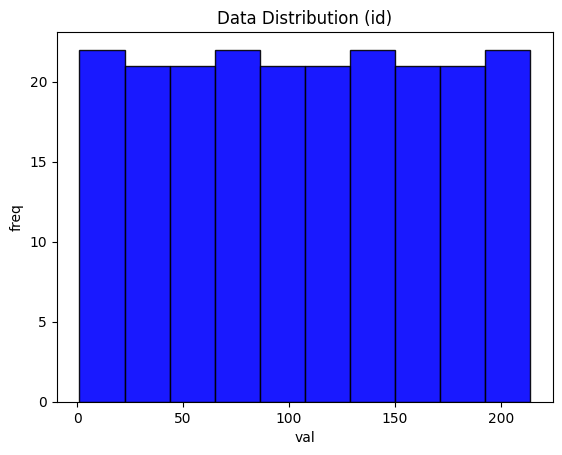

In [6]:
# function {HISTOGRAM()} is used to generate histograms to display
# data distribution across each column;

HISTOGRAM(dataset = df_glass['id'], 
          colour = 'blue', 
          title = 'Data Distribution (id)')

#### **[refractive index]**

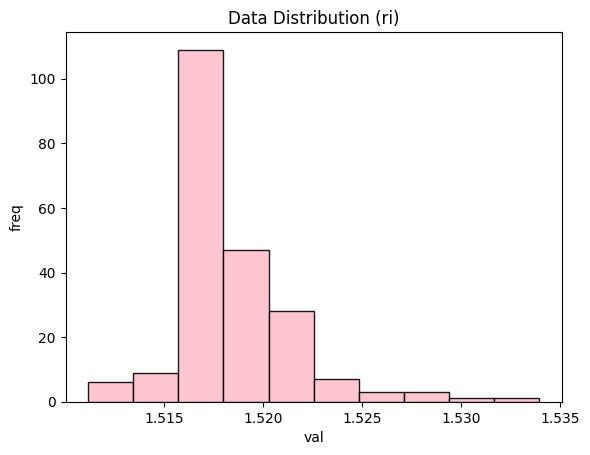

In [7]:
HISTOGRAM(dataset = df_glass['ri'], 
          colour = 'pink', 
          title = 'Data Distribution (ri)')

#### **[sodium]**

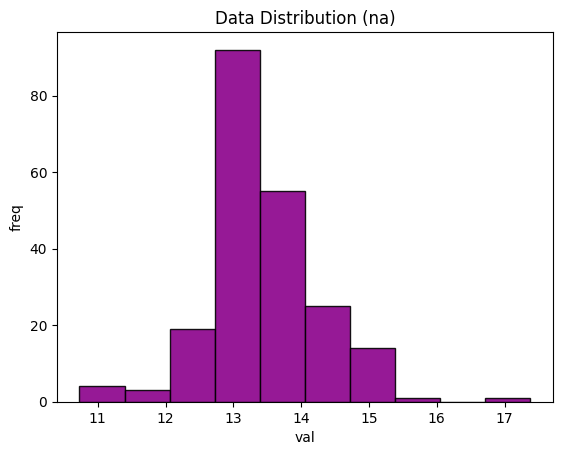

In [8]:
HISTOGRAM(dataset = df_glass['na'], 
          colour = 'darkmagenta', 
          title = 'Data Distribution (na)')

#### **[magnesium]**

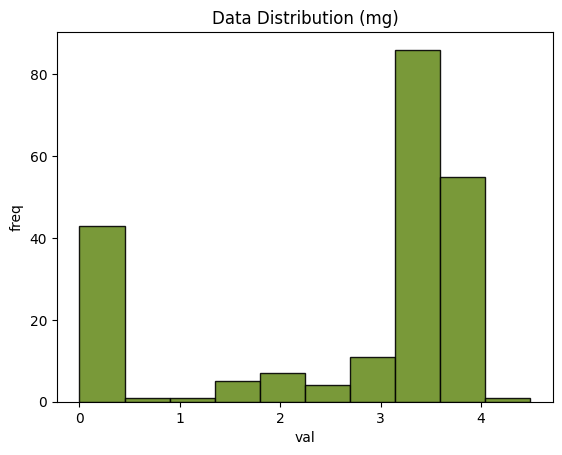

In [9]:
HISTOGRAM(dataset = df_glass['mg'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (mg)')

#### **[aluminium]**

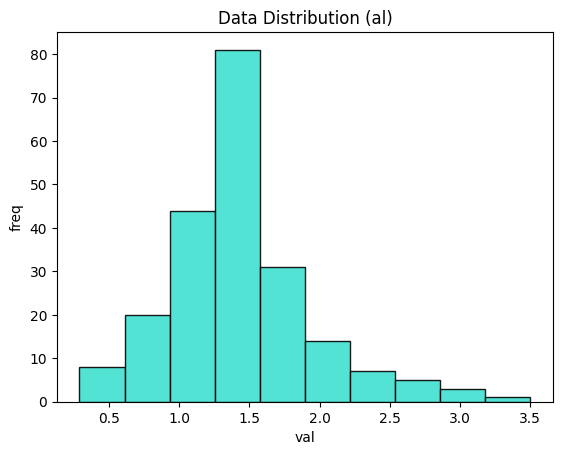

In [10]:
HISTOGRAM(dataset = df_glass['al'], 
          colour = 'turquoise', 
          title = 'Data Distribution (al)')

#### **[silicon]**

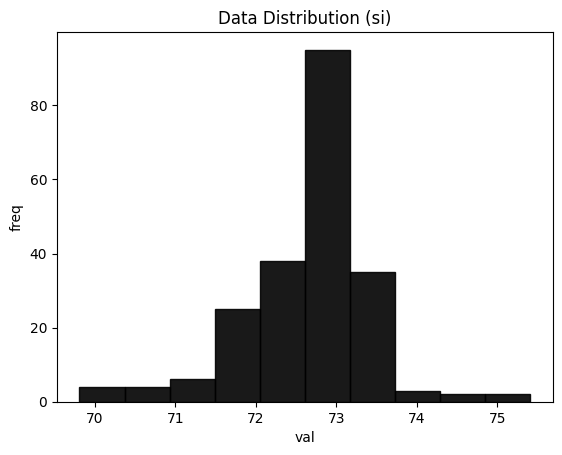

In [11]:
HISTOGRAM(dataset = df_glass['si'], 
          colour = 'black', 
          title = 'Data Distribution (si)')

#### **[potassium]**

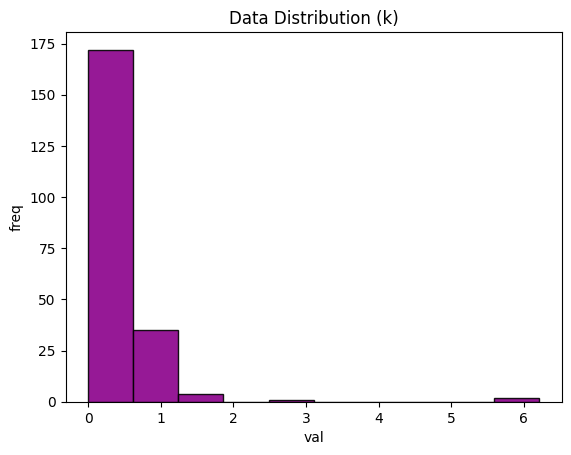

In [12]:
HISTOGRAM(dataset = df_glass['k'], 
          colour = 'darkmagenta', 
          title = 'Data Distribution (k)')

#### **[calcium]**

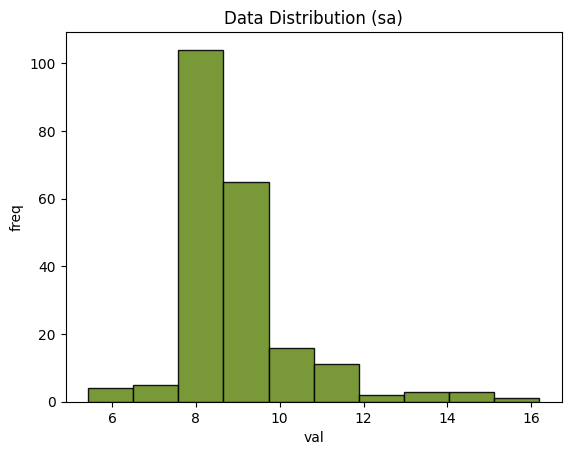

In [13]:
HISTOGRAM(dataset = df_glass['ca'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (sa)')

#### **[barium]**

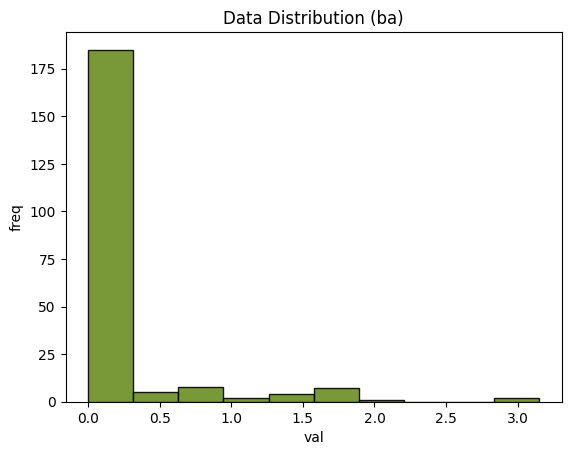

In [14]:
HISTOGRAM(dataset = df_glass['ba'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (ba)')

#### **[iron]**

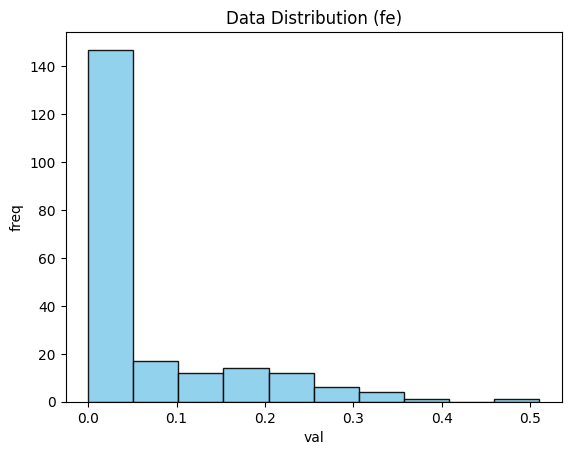

In [15]:
HISTOGRAM(dataset = df_glass['fe'], 
          colour = 'skyblue', 
          title = 'Data Distribution (fe)')

#### **[type of glass]**

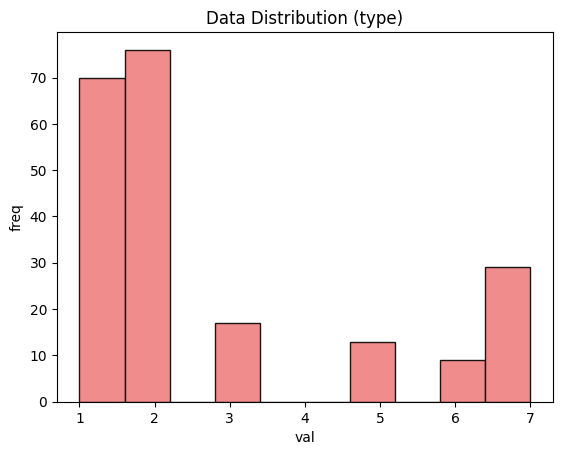

In [16]:
HISTOGRAM(dataset = df_glass['type'], 
          colour = 'lightcoral', 
          title = 'Data Distribution (type)')

<Axes: ylabel='count'>

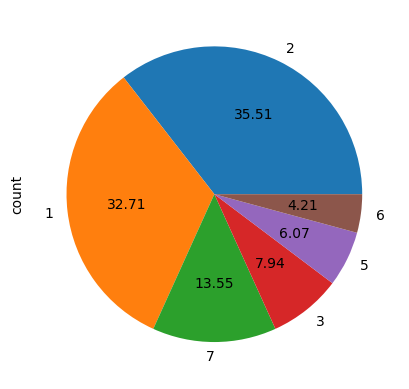

In [17]:
df_glass['type'].value_counts().plot.pie(autopct = '%.2f')

In [18]:
columns = ['ri',
           'na',
           'mg',
           'al',
           'si',
           'k',
           'ca',
           'ba',
           'fe',
           'type']

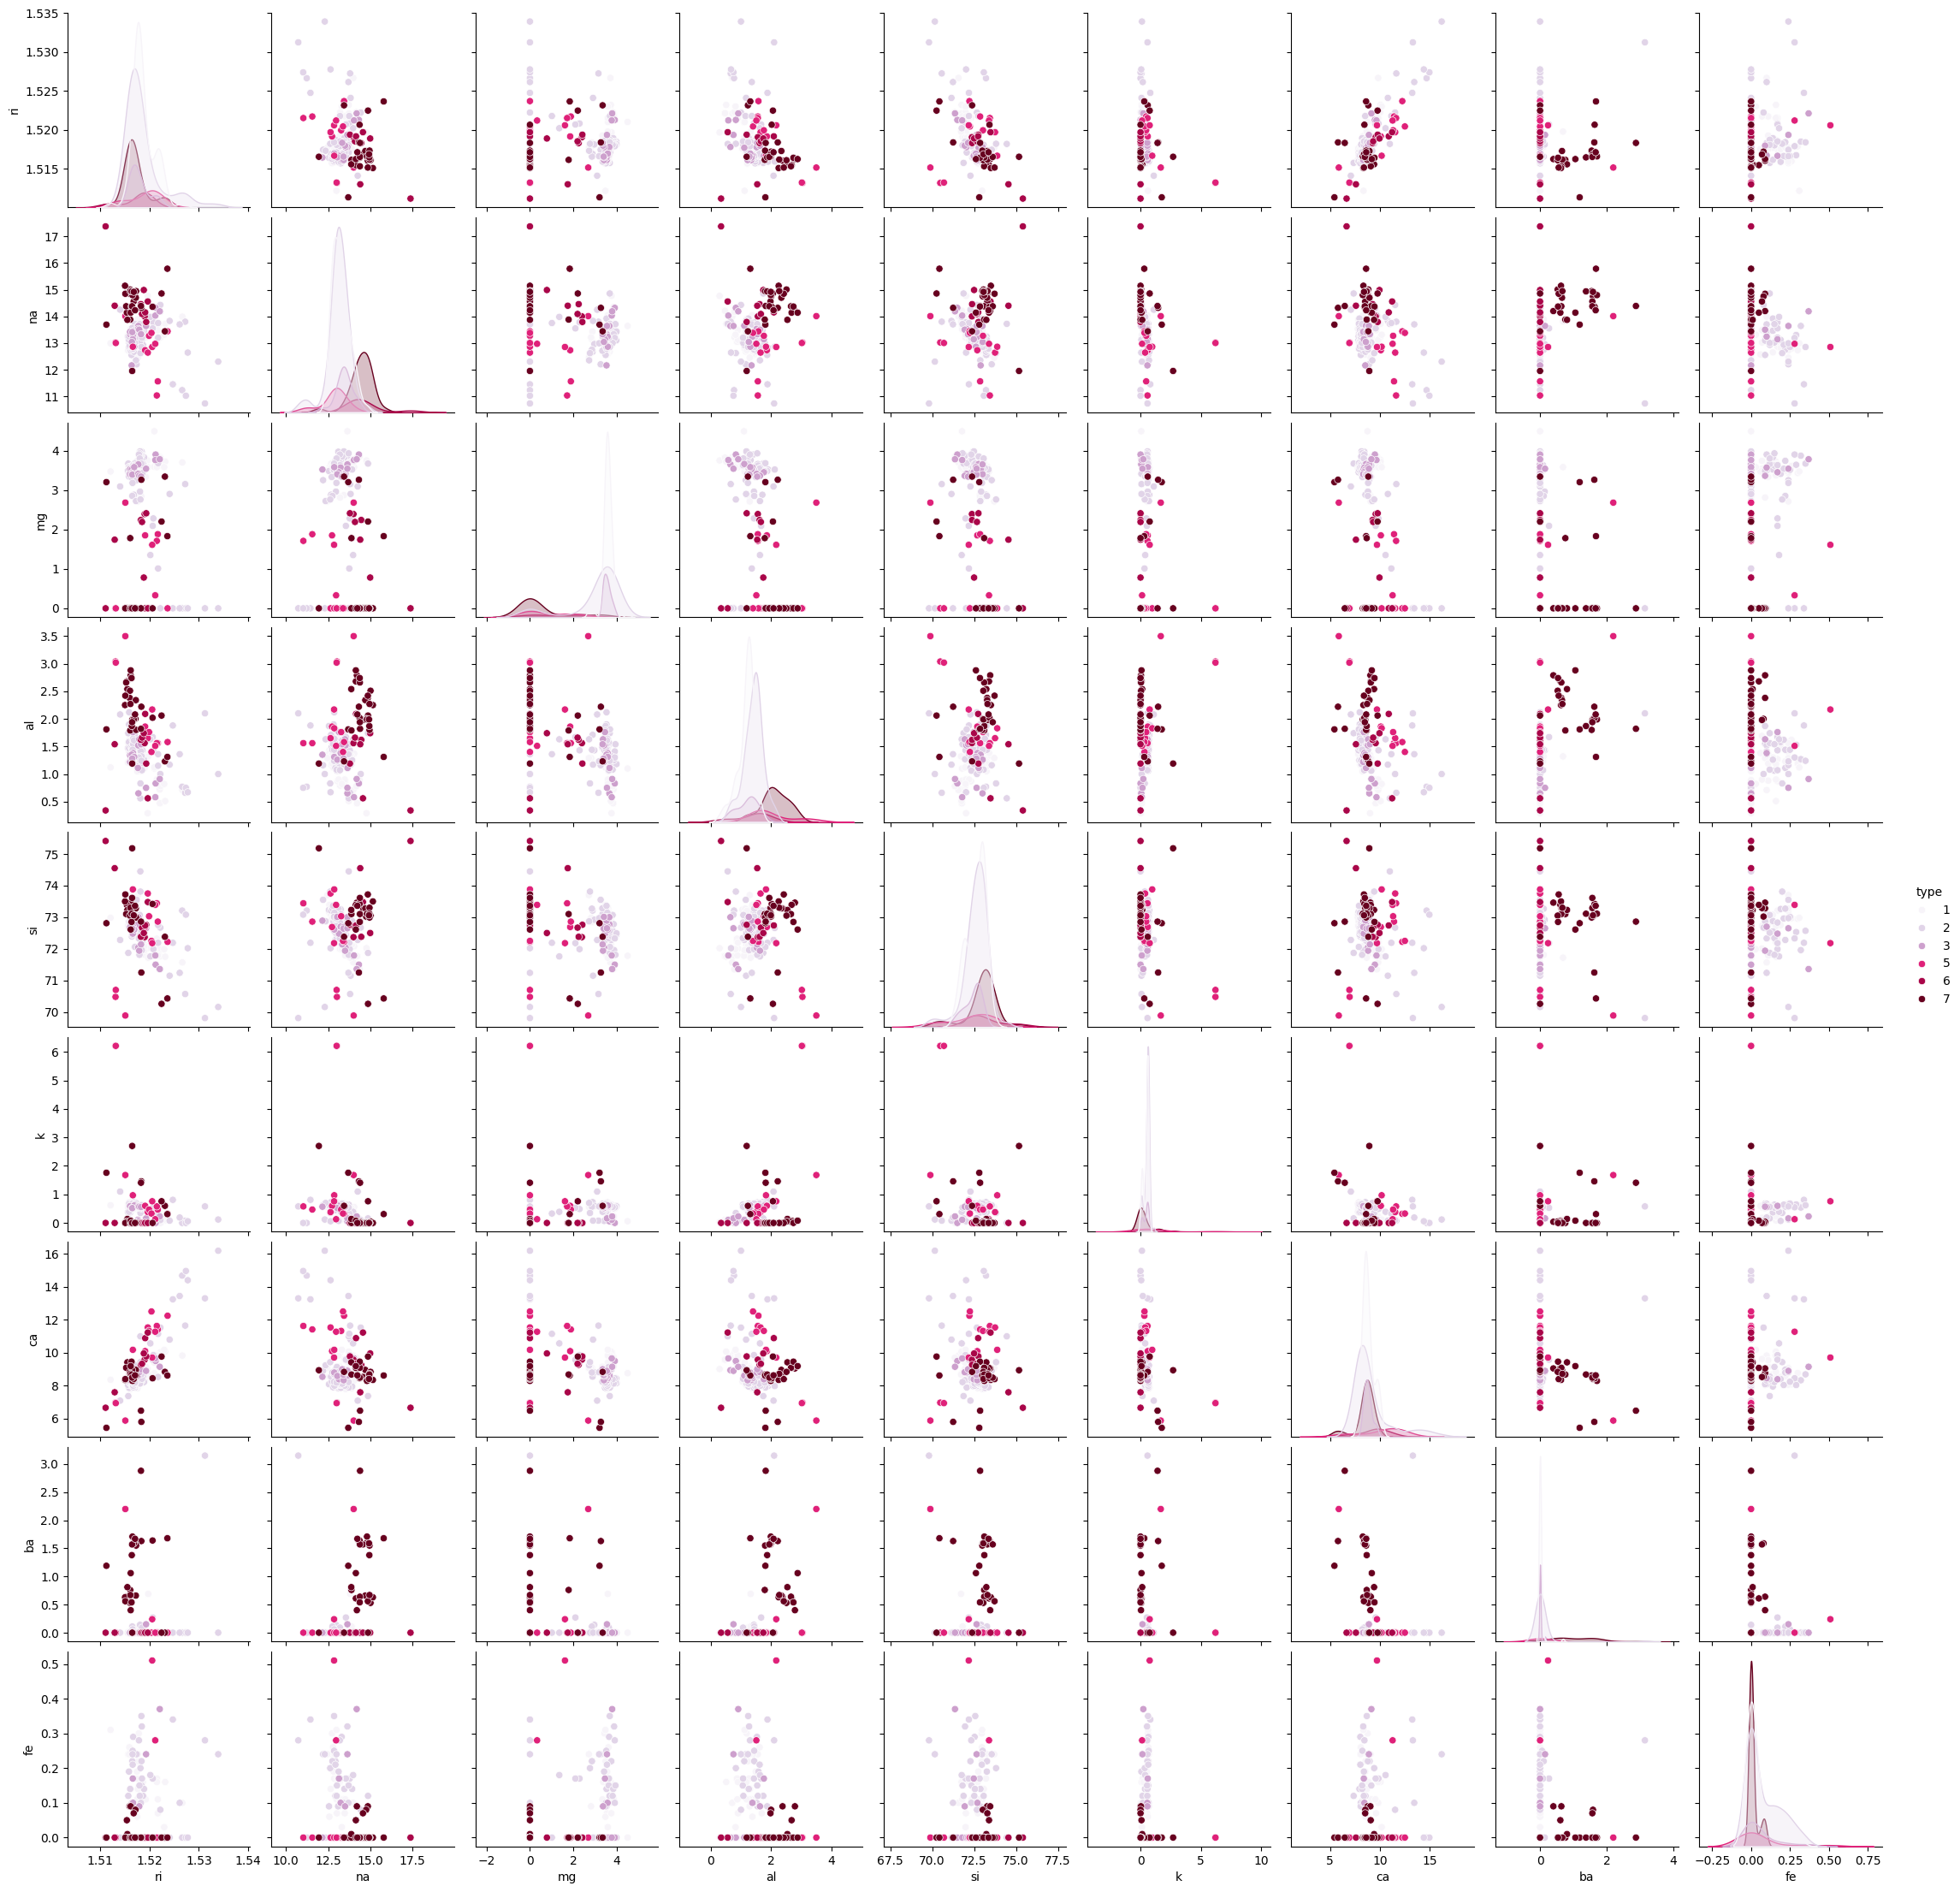

In [19]:
sns.pairplot(df_glass[columns],
             hue = 'type',
             palette = 'PuRd')
plt.show()

In [20]:
correlation_matrix = df_glass[columns].corr()

correlation_matrix

,ri,na,mg,al,si,k,ca,ba,fe,type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

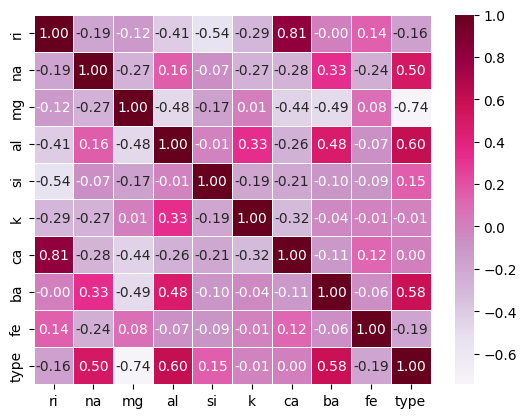

In [21]:
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'PuRd',
            fmt = '.2f',
            linewidths = 0.5)

## **Results...**
### _DTYPES :_ 
#### - there are no categorical dtypes present within the dataset
#### - most columns consist of float dtypes with only two columns, ('id' and 'type') consisting of integers
#### - while column 'type' consists of integers, the classes within this column are nominal, and as such should not be represented by integers as it implies the classes are of an ordinal nature
#
### _SHAPE :_
#### - the dataset has 214 rows and 11 features before preprocessing
#
### _NOTABLE STATISTICAL OBSERVATIONS :_
#### - **[id]**, this column features an extreme standard deviation value of 62, and extreme variance with a minimum value of 1 and a maximum of 214
#### - **[potassium, calcium, barium, iron]**, the mean value of these columns incline heavily towards to the minimum value than the maximum, suggesting the presence of outliers
#### - **[type]**, this column features a standard deviation value of 2.1, while not being extreme is considerably higher than the avaerage standard deviation value found across each column
#### - there is a high positive correlation between calcium levels and refractive index,
#### - there is a notable positive correlation between features **[sodium, aluminium]** and feature **[type]**
#### - there is a notable positive correlation between **[calcium]** and **[refractive index]**
#### - there is a notable negative correlation between feature **[magnesium]** and feature **[type]**
#### - **[potassium, barium, iron]** have no linear correlation with the target variable **[type]**
#
### _MISSING VALUES :_
#### - there are no missing values within this dataset
#
### _UNIQUE VALUES :_
#### - there are 34 unique values in column **[barium]** and 32 in **[iron]**, this is interesting as both features are ordinal, and considering the dataset contains 214 rows in total this is a relatively low number
#### - the **[type]** column supposedly contains 7 classes according to the data dictionary provided in the exam brief, however only 6 unique values are present in the actual dataset, this will need to be explored further to determine which class specifically is absent
#
## **key insights gained...** 
- while there are no categorical dtypes present within the dataset, the **[type]** column should be one-hot encoded as the classes within this column are of a nominal nature, and in their current state, a machine learning model would interpret them to be of an ordinal nature and as such would arbitrarily assign higher importance to higher integer values.
&nbsp;
- the **[id]** column serves no purpose other than to uniquely identify each row, as pandas dataframes automatically index each row, there is no need for this column and its presence would only confuse results output from a machine learning model, especially considering its extreme statistical values, and should be omitted.
&nbsp; 
- columns **[potassium, calcium, barium, iron]** feature mean values which incline heavily towards the minimum value, this could imply the presence of outliers within the dataset, the **[type]** column is also quite imbalanced, and should be resampled to flatten the distribution. As the **[type]** column is our target variable within the context of a classification problem, resampling is necessary to ensure accurate and reliable results are output from a neural network classifier.
&nbsp;
- **[potassium, barium, iron]** have no direct linear relationship with the target variable **[type]**, however, this could just mean that the relationship between these columns and the target are more complex; if so a neural network methodology would be best suited to understanding and interpreting such a relationship.
&nbsp;
- Considering that 4 out of 10 columns of which represent meaningful values likely feature outliers due to their mean values inclining greatly towards their minimum values, this could indicate that the outliers present are valid, and both possibilities should be considered; train and test sets should be created wherein outliers are and are not mitigated respectively to gain a deeper understanding of this relationship.
&nbsp;
- the lack of unique values present within columns **[barium, iron]** should be explored further, as should the absence of a class within the **[type]** column. 

## Identify Outliers Present:

In [22]:
# instantiate a version of the DataFrame without the target column to
# the variable {outlier_detection};

outlier_detection = df_glass.drop(columns = ['type'])

# use method {df.quantile()} to determine the lower quartile;

Q1 = outlier_detection.quantile(0.25)

# and repeat to find the higher quartile;

Q3 = outlier_detection.quantile(0.75)

# calculate interquartile range by subtracting the lower quartile
# from the higher quartile;

IQR = Q3 - Q1

# detect outliers by first setting an upper and lower bound limit,
# then instantiate any values that sit above or below this bound to 
# the variable {outliers} as a tuple;

outliers = ((outlier_detection < (Q1 - 1.5 * IQR)) | 
            (outlier_detection > (Q3 + 1.5 * IQR)))

# calculate the total number of outliers present within tuple {outliers}
# and instantiate this value to the variable {outlier_total};

outlier_total = outliers.sum()

# store this data in an interpretable manner within a multi-line
# f-string...

outlier_info = f'''outliers per column: 

{outlier_total}'''

# ...and display these results;

print(outlier_info)   

outliers per column: 

id     0
ri    17
na     7
mg     0
al    18
si    12
k      7
ca    26
ba    38
fe    12
dtype: int64


- as anticipated, **[barium, calcium]** contain many outliers,
- surprisingly **[iron, potassium]** hold relatively little outliers. Considering the extremely skewed mean values of these columns, this suggests the outliers present, while few; are particularly extreme.
- **[refractive index, aluminium, sodium]** also contain some outliers however are likely not extreme considering the mean value of these columns has a central tendency 

In [23]:
# Investigate column {'type'} to determine which unique value present
# in the data dictionary provided, is missing from the dataset;

print(df_glass['type'].unique())

[1 2 3 5 6 7]


- value **[4]** is missing, which represents **[vehicle windows (non-float)]** 

## Remove Unnecessary Column(s):

In [24]:
# column {'id'} serves no practical purpose within the context of this
# study, and will in fact only confuse the model and should be omitted;

df_glass = df_glass.drop(columns = ['id'])

# sanity check;

print(df_glass.shape)

df_glass

(214, 10)


,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Rename Columns:

In [25]:
# columns are renamed to increase interpretability;

df_glass = df_glass.rename(columns = {'ri': 'Refractive Index', 
                                      'na': 'Sodium',
                                      'mg': 'Magnesium', 
                                      'al': 'Aluminium',
                                      'si': 'Silicon', 
                                      'k': 'Potassium',
                                      'ca': 'Calcium', 
                                      'ba': 'Barium',
                                      'fe': 'Iron', 
                                      'type': 'Type'})

df_glass

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Feature Engineering / Splitting the DataFrame into Training and Testing Sets:

In [26]:
# a multi-class classification target is created by first slicing the {'Type'} column
# from the dataset...

target = df_glass.iloc[:, 9:10]

# ...and instantiating it to the variable {target};

target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [27]:
# features are then created by using pandas method {df.drop()} to omit 
# the target feature from the dataset...

features = df_glass.drop(columns = ['Type'])

# ...this new dataset is then instantiated to the variable {features};

features

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


## Train / Test / Split:

In [28]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# features {features} and {target} as input;

X_train75, X_test25, y_train75, y_test25 = train_test_split(features,
                                                            target,
                                                            random_state = 42,
                                                            test_size = 0.25)

## Create a Multi-Class Classification Target:

In [29]:
# test target set is one-hot encoded to create a multi-class classification
# target;

y_test25 = pd.get_dummies(y_test25,
                          columns = ['Type'],
                          drop_first = False)

# each new column is then renamed to increase interpretability;

y_test25 = y_test25.rename(columns = {'Type_1': 'Building Windows (float)',
                                      'Type_2': 'Building Windows (non-float)', 
                                      'Type_3': 'Vehicle Windows (float)', 
                                      'Type_5': 'Containers',
                                      'Type_6': 'Tablewear', 
                                      'Type_7': 'Headlamps',})

# index is reset using pandas method {df.reset_index()},
# parameter {drop} is set to {True} to eliminate the automatically
# generated {index} column as it is uneccessary;

y_test25 = y_test25.reset_index(drop = True)

In [30]:
# check the target DataFrame;

y_test25

,Building Windows (float),Building Windows (non-float),Vehicle Windows (float),Containers,Tablewear,Headlamps
0,True,False,False,False,False,False
1,False,False,False,False,False,True
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,True,False,False,False,False
5,False,True,False,False,False,False
6,True,False,False,False,False,False
7,False,True,False,False,False,False
8,False,True,False,False,False,False
9,False,True,False,False,False,False


## Resampling Train Target Set:
&nbsp;
- _only the training set will be resampled, as the model should be capable of performing accurately on imbalanced test sets. Randomly sampling the test set would likely cause in overfitting or otherwise sub-optimal performance..._

<Axes: ylabel='count'>

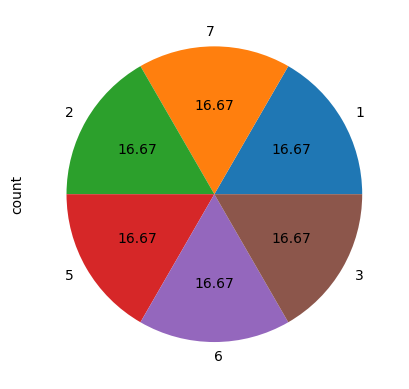

In [31]:
# {RandomOverSampler()} object is instantiated to the variable {ros},
# parameter {sampling_strategy} is set to {'not majority'} in order 
# to resample the values with a lower representation than the majority
# class until the entire column is balanced;

ros = RandomOverSampler(sampling_strategy = 'not majority')

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

resample = pd.concat([X_train75, y_train75],
                     axis = 1)

# {X} and {y} are then fit to the {RandomOverSampler()} object {ros} and the newly 
# resampled target and features are instantiated to variables {X} and {y};

X, y = ros.fit_resample(resample.drop(columns = ['Type']), resample['Type'])

# a new {resample} dataset is created by concatenation {X} and {y}...

resample = pd.concat([X, y],
                     axis = 1)

# ...and the new distribution is displayed with a pie chart;

resample['Type'].value_counts().plot.pie(autopct = '%.2f')

_the distribution for the target train set is now more evenly balaced._

## Convert the X Train Set into a Resampled Feature Set to Match the New Target:

In [32]:
X_train75 = resample.drop(columns = ['Type']) 

X_train75

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.00,0.00
1,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
2,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00
3,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15
4,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00
...,...,...,...,...,...,...,...,...,...
331,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
332,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08
333,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07
334,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


## Convert the y Train Set into a Multi-Class Target: 

In [33]:
# resampled target column {'Type'} is instantiated to the variable {y_resampled};

y_resampled = resample['Type']

# train target set is one-hot encoded to create a multi-class classification
# target;

y_train75 = pd.get_dummies(y_resampled,
                           columns = ['Type'],
                           drop_first = False)

# columns are renamed to improve interpretability...

y_train75 = y_train75.rename(columns = {1: 'Building Windows (float)',
                                        2: 'Building Windows (non-float)', 
                                        3: 'Vehicle Windows (float)', 
                                        5: 'Containers',
                                        6: 'Tablewear', 
                                        7: 'Headlamps'})

# ...and the index is reset;

y_train75 = y_train75.reset_index(drop = True)

# sanity check;

y_train75

,Building Windows (float),Building Windows (non-float),Vehicle Windows (float),Containers,Tablewear,Headlamps
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,True
3,False,True,False,False,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
331,False,False,False,False,False,True
332,False,False,False,False,False,True
333,False,False,False,False,False,True
334,False,False,False,False,False,True
